**Random Forest**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Numeric features: ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Categorical features: ['model', 'transmission', 'fuelType', 'Make']

       📊 MODEL PERFORMANCE REPORT       
Accuracy:     91.71%
R2 Score:     0.9024

--- First 10 Predictions ---
   Actual  Predicted  Difference    Error %
0   23444  32599.135    9155.135  39.051079
1   11795  11605.630    -189.370  -1.605511
2   12250  12855.180     605.180   4.940245
3   33995  23222.760  -10772.240 -31.687719
4    8494   6792.040   -1701.960 -20.037203
5    5499   5917.620     418.620   7.612657
6   10741   9243.530   -1497.470 -13.941626
7   10781  13365.560    2584.560  23.973286
8   22990  24303.800    1313.800   5.714659
9   19850  16150.650   -3699.350 -18.636524


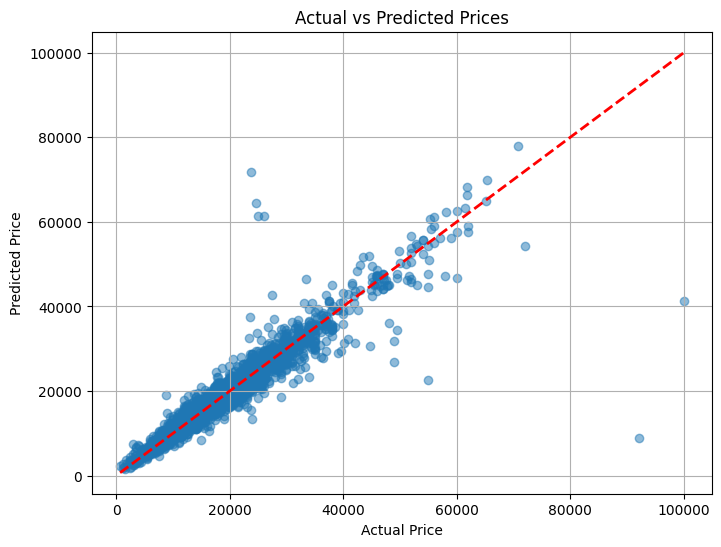

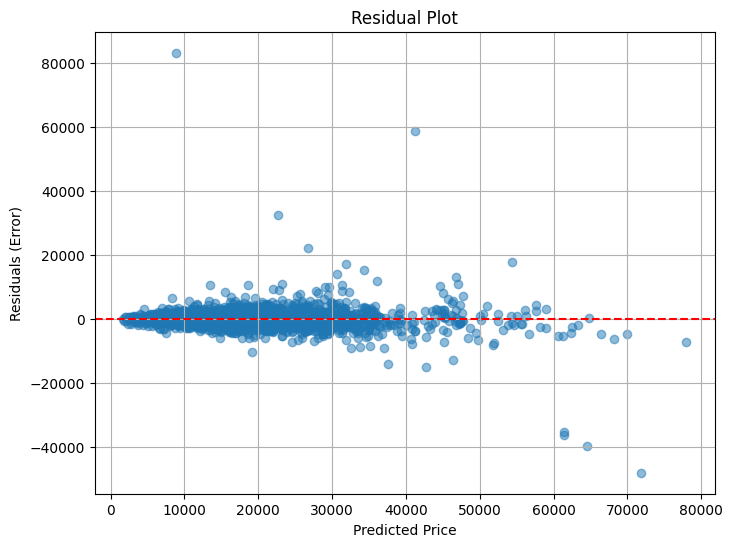

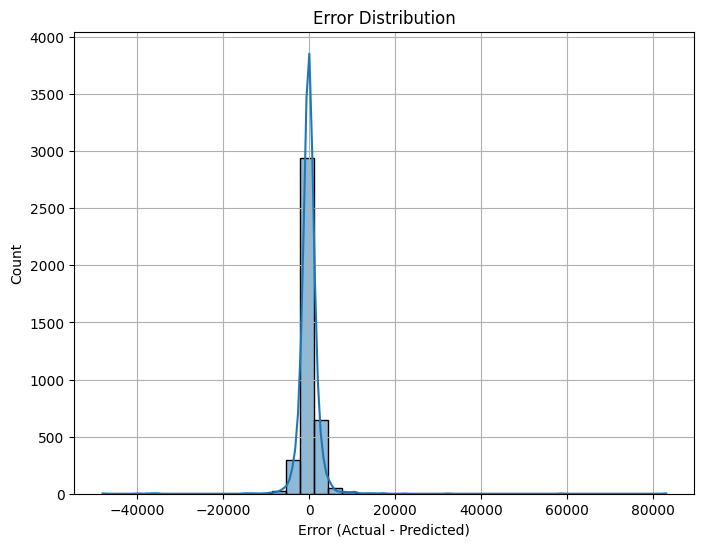

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# 1. Load the Data
file_path = '/content/drive/MyDrive/cars_dataset_20k.csv'
df = pd.read_csv(file_path)


# 2. Features and Target
X = df.drop('price', axis=1)
y = df['price']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# 3. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 4. Train/Test Split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# 5. RandomForest (ONLY ONE HYPERPARAMETER)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)


# 6. Evaluation

r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print("\n" + "="*40)
print("       📊 MODEL PERFORMANCE REPORT       ")
print("="*40)
print(f"Accuracy:     {accuracy:.2f}%")
print(f"R2 Score:     {r2:.4f}")
print("="*40)

# 7. Comparison Table
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

comparison['Difference'] = comparison['Predicted'] - comparison['Actual']
comparison['Error %'] = (comparison['Difference'] / comparison['Actual']) * 100

print("\n--- First 10 Predictions ---")
print(comparison.head(10))


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel("Error (Actual - Predicted)")
plt.title("Error Distribution")
plt.grid(True)
plt.show()



**Neural Networks
**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Numeric features: ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Categorical features: ['model', 'transmission', 'fuelType', 'Make']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 312335392.0000 - val_loss: 29255998.0000
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 23195298.0000 - val_loss: 21156214.0000
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18754154.0000 - val_loss: 18829866.0000
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 16911538.0000 - val_loss: 17351424.0000
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13966298.0000 - val_loss: 16320255.0000
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12967767.0000 - val_loss: 15519567.0000
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14014001.0000 - val_loss: 14923846.0000
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12464446.0000 - val_loss: 14231880.0000
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12900434.0000 - val_loss: 13632411.0000
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10511991.0000 - val_loss: 13

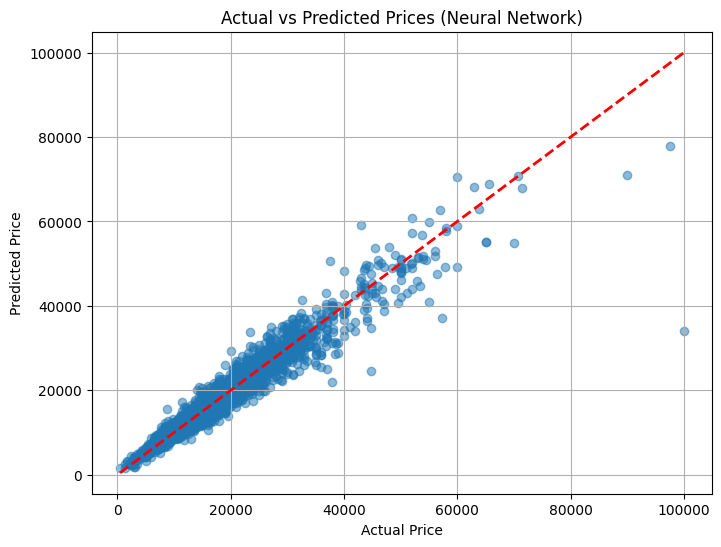

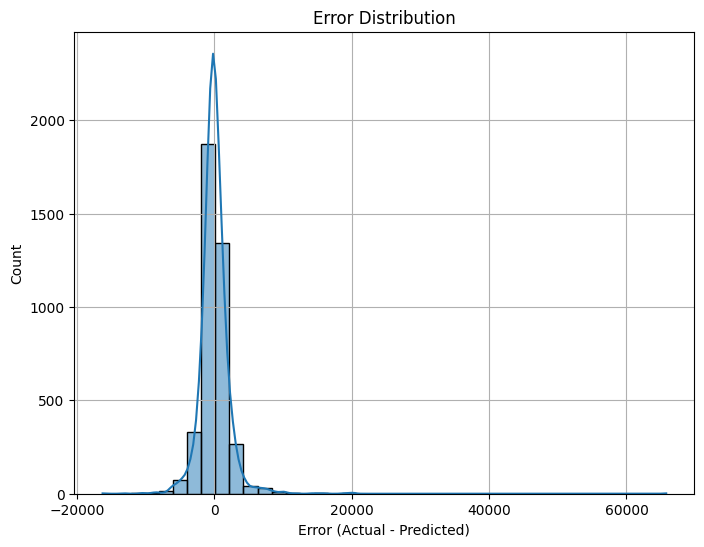

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import drive
drive.mount('/content/drive')

# 1. Load the Data
file_path = '/content/drive/MyDrive/cars_dataset_20k.csv'
df = pd.read_csv(file_path)

# 2. Features and Target
X = df.drop('price', axis=1)
y = df['price']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


# 3. Preprocessing(rivision onehot encoder)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


# 5. Define the Neural Network Architecture

model = Sequential()


model.add(Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_transformed,
    y_train,
    epochs=100,
    batch_size=40,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predict
y_pred = model.predict(X_test_transformed).flatten()




    # 6. Evaluation

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print("\n" + "="*40)
print("       📊 NEURAL NETWORK REPORT       ")
print("="*40)
print(f"Accuracy (approx): {accuracy:.2f}%")
print(f"RMSE:              {rmse:,.2f}")
print(f"R2 Score:          {r2:.4f}")
print("="*40)

# 8. Comparison Table
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
comparison['Difference'] = comparison['Predicted'] - comparison['Actual']
comparison['Error %'] = (comparison['Difference'] / comparison['Actual']) * 100

print("\n--- First 10 Predictions ---")
print(comparison.head(10))

# 9. Visualization


# Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Neural Network)")
plt.grid(True)
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel("Error (Actual - Predicted)")
plt.title("Error Distribution")
plt.grid(True)
plt.show()
